In [70]:
import pandas as pd
import numpy as np
import os
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz #display 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.externals.six import StringIO   #write 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression#model

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [7]:
df=pd.read_csv("data_2_var.CSV")

In [8]:
df

,A,B
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


# Checking Null value

In [10]:
df.isnull().sum()

A    0
B    0
dtype: int64

<AxesSubplot:>

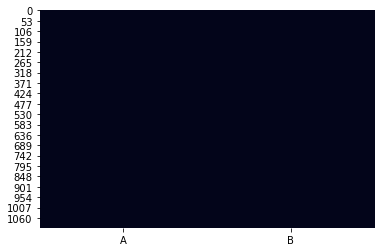

In [18]:
sns.heatmap(df.isnull(), cbar=False)

# Remove constant value

In [12]:
df=df.loc[:,df.apply(pd.Series.nunique) != 1].copy()

# Making Copy of data Frame

In [14]:
df1=df.copy()

In [17]:
df1.describe()

,A,B
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


# Before outliers treatment

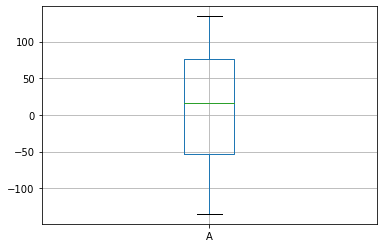

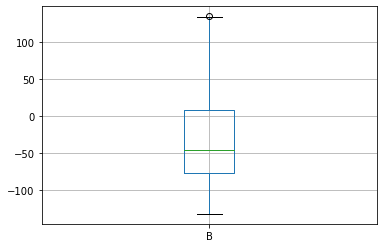

In [19]:
for cols in df1:
    plt.figure()
    df1.boxplot(cols)

A


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


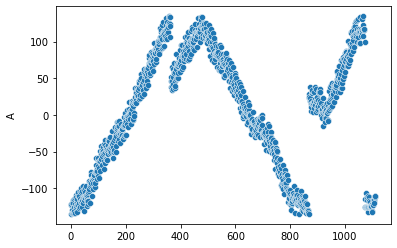

B


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


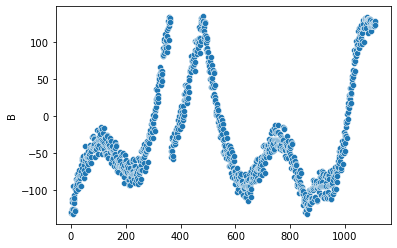

In [20]:
for i in df1.columns:
    print(i)
    sns.scatterplot(df1.index,df1[i])
    plt.show()

# Remove Outliers

In [21]:
for i in df1.columns:
    Q1=df1[i].quantile(0.25)
    Q2=df1[i].quantile(0.50)
    Q3=df1[i].quantile(0.75)
    
    IQR=Q3-Q1
    
    
    df1[i]=np.where(df1[i]>(Q3+1.5*IQR),np.nan,df1[i])
    df1[i]=np.where(df1[i]<(Q1-1.5*IQR),np.nan,df1[i])

In [22]:
Q1,Q3

(-77.0, 7.435230512)

In [23]:
df1.isnull().sum()

A    0
B    1
dtype: int64

# After Outlier Treatment

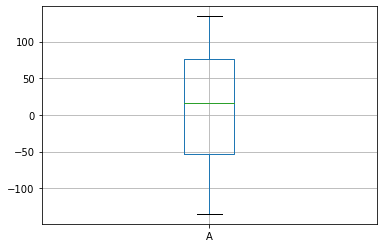

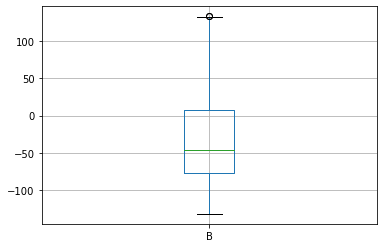

In [25]:
for cols in df1:
    plt.figure()
    df1.boxplot(cols)

In [26]:
#these outerlier you can see here after outlier treatment but you can see in scatter polt its not the outlier thats i dont want to do again outlier treatment

A


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


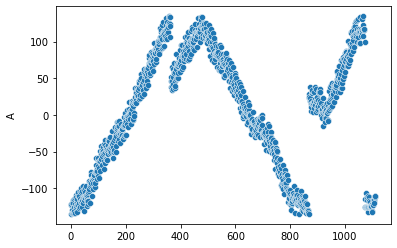

B


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


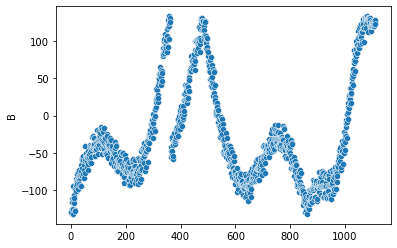

In [28]:
for i in df1:
    print(i)
    sns.scatterplot(df.index,df1[i])
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B', ylabel='Density'>

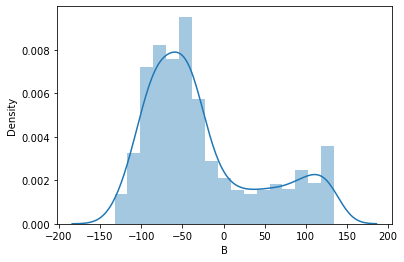

In [30]:
sns.distplot(df["B"])

In [29]:
y=df["B"]#dependent
x=df["A"]#independent

In [31]:
x.shape#check the size of Deapendent variable

(1111,)

In [32]:
y.shape#check the size of independent variable

(1111,)

# Reshaping the independent Variable

In [33]:
#The Library required 2D Value for processing but the independent Variable is 1D so Covert the 1D variable into 2D Variable

In [34]:
x_matrix=x.values.reshape(-1,1)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_matrix,y,test_size=0.25)


# Bulid the LinearRegression Model

In [50]:
reg=LinearRegression()#model

In [51]:
reg.fit(x_train,y_train)# best m and c value

LinearRegression()

# Value of Slope [m]

In [52]:
reg.coef_#slope /m value

array([0.49742767])

# Value of intercept [c]

In [53]:
reg.intercept_#y intercept/c

20.48498694564013

# Prediction of model

In [54]:
predy=reg.predict(x_test)

In [59]:
reg.predict(np.array(170).reshape(-1,1))

array([105.04769115])

In [60]:
reg.score(x_train,y_train)

0.19166788285668457

In [61]:
reg.score(x_test,y_test)

0.24908206729331506

# Scatter plot for Predicted all value

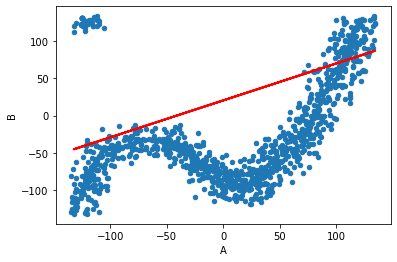

In [62]:
allpred=reg.predict(x_matrix)#predicted for all value
df1.plot(kind="scatter",x="A",y="B")#scatter plot
plt.plot(x,allpred,c="red",linewidth=2)#drawing the bestfitline

# HYperparameter tunning

In [72]:
X = df1.drop(columns = 'B') 
y = df1['B'] #target

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [74]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'